In [13]:
import numpy as np
import matplotlib.pyplot

cutoff = 300

# importing the training data
encodings = []
ages_distr = []
for i in range(1, 101):
    enc = np.load(f'extracted_encodings/train/X{i}.npy')[:cutoff]
    ages_distr.append(enc.shape[0])
    enc_i = np.concatenate((enc, i * np.ones((enc.shape[0], 1))), axis=1)
    encodings.append(enc_i)
encodings = np.concatenate(encodings)                                  # matrix with ages column  

# importing the testing data
test_encodings = []
test_ages_distr = []
for i in range(1, 101):
    enc = np.load(f'extracted_encodings/test/X{i}.npy')[:cutoff]
    test_ages_distr.append(enc.shape[0])
    enc_i = np.concatenate((enc, i * np.ones((enc.shape[0], 1))), axis=1)
    test_encodings.append(enc_i)
test_encodings = np.concatenate(test_encodings)                                  # matrix with ages column  

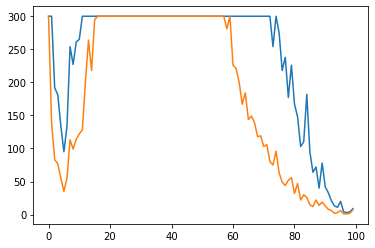

In [14]:
#age distribution
matplotlib.pyplot.plot(range(100),ages_distr)
#age distribution of testing data
matplotlib.pyplot.plot(range(100),test_ages_distr)

In [15]:
#separating the data
X = encodings[:,:-1]           # matrix without ages column
Y = encodings[:,-1]            # ages only

#separating the test data
X_test = test_encodings[:,:-1]           # matrix without ages column
Y_test = test_encodings[:,-1]            # ages only

In [16]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, Y)
#np.save("StupidLR", ref.coef_)

#MSE
np.sum(np.power(reg.predict(X_test) - Y_test,2))/Y_test.shape[0]

130.68561568015386